<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/house_price_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# import the libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1.Data collection and reading it

you can download the dataset from this link
" https://www.kaggle.com/datasets/yasserh/housing-prices-dataset "


In [2]:
data = pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# 2.Data preprocessing


## check if there is a missing value or not


In [5]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Check if there is a duplicate value or not


In [6]:
data.duplicated().sum()

np.int64(0)

## Check the count of values in categorical columns


In [7]:
data['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [8]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
ls = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea', 'furnishingstatus']

for i in ls:
  print(data[i].value_counts())
  print('-'*55)

mainroad
yes    468
no      77
Name: count, dtype: int64
-------------------------------------------------------
guestroom
no     448
yes     97
Name: count, dtype: int64
-------------------------------------------------------
basement
no     354
yes    191
Name: count, dtype: int64
-------------------------------------------------------
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
-------------------------------------------------------
airconditioning
no     373
yes    172
Name: count, dtype: int64
-------------------------------------------------------
prefarea
no     417
yes    128
Name: count, dtype: int64
-------------------------------------------------------
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
-------------------------------------------------------


## Convert the categorical columns by one-hot encoding to numerical values


In [10]:
one_hot_encoding = pd.get_dummies(data , 
                                columns= ls ).astype('int')

one_hot_encoding.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [11]:
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    int64
 7   mainroad_yes                     545 non-null    int64
 8   guestroom_no                     545 non-null    int64
 9   guestroom_yes                    545 non-null    int64
 10  basement_no                      545 non-null    int64
 11  basement_yes                     545 non-null    int64
 12  hotwaterheating_no               545 non-null    i

In [12]:
one_hot_encoding.describe()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,...,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,0.141284,0.858716,0.822018,0.177982,...,0.350459,0.954128,0.045872,0.684404,0.315596,0.765138,0.234862,0.256881,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.348635,0.348635,0.382849,0.382849,...,0.477552,0.209399,0.209399,0.465180,0.465180,0.424302,0.424302,0.437314,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **UPDATE**

In [13]:
# Label encoding for each column in ls
label_encoding = data

for col in ls:
    label_encoding[col] = label_encoding[col].astype("category").cat.codes

label_encoding.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


# 3.Data Exploration & Visualization


In [14]:
# for col in one_hot_encoding.select_dtypes(include=['int64']).columns:
  
#   plt.figure(figsize=(6,4))
#   sns.histplot(one_hot_encoding[col] )

#   plt.title(f"Distribution of {col}")
#   plt.xlabel(col)
#   plt.ylabel("Frequency")
#   plt.show()

In [15]:
from scipy.stats import shapiro

stat,p = shapiro(one_hot_encoding['area'])
print("statistic:", stat , "p-value:" , p)

if p> 0.05:
  print("Gaussian")
else :
  print("no")

statistic: 0.9112926165336072 p-value: 2.5971521072657363e-17
no


In [16]:
data1 = one_hot_encoding.drop('price' , axis=1)

# NEW
data_2 = label_encoding.drop('price' , axis=1)

## Normalize the dataset


In [17]:
st = MinMaxScaler()
numeric_col = data1.select_dtypes(include=['int64']).columns
data1[numeric_col]= st.fit_transform(data1[numeric_col])

# NEW
numeric_col = data_2.select_dtypes(include=['int64']).columns
data_2[numeric_col]= st.fit_transform(data_2[numeric_col])

In [18]:
data1.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,0.6,0.333333,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [19]:
data_2.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0


In [20]:
data1.describe()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.240587,0.393028,0.095413,0.268502,0.231193,0.141284,0.858716,0.822018,0.177982,0.649541,0.350459,0.954128,0.045872,0.684404,0.315596,0.765138,0.234862,0.256881,0.416514,0.326606
std,0.149151,0.147613,0.167490,0.289164,0.287195,0.348635,0.348635,0.382849,0.382849,0.477552,0.477552,0.209399,0.209399,0.465180,0.465180,0.424302,0.424302,0.437314,0.493434,0.469402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134021,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.202749,0.400000,0.000000,0.333333,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.323711,0.400000,0.333333,0.333333,0.333333,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
data_2.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.240587,0.393028,0.095413,0.268502,0.858716,0.177982,0.350459,0.045872,0.315596,0.231193,0.234862,1.069725
std,0.149151,0.147613,0.167490,0.289164,0.348635,0.382849,0.477552,0.209399,0.465180,0.287195,0.424302,0.761373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.134021,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.202749,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.323711,0.400000,0.333333,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [22]:
corr_target = one_hot_encoding.corr(numeric_only=True)
one_hot_encoding['price'].sort_values(ascending = False)
print(corr_target)

                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.535997  0.366494   0.517545   
area                             0.535997  1.000000  0.151858   0.193820   
bedrooms                         0.366494  0.151858  1.000000   0.373930   
bathrooms                        0.517545  0.193820  0.373930   1.000000   
stories                          0.420712  0.083996  0.408564   0.326165   
parking                          0.384394  0.352980  0.139270   0.177496   
mainroad_no                     -0.296898 -0.288874  0.012033  -0.042398   
mainroad_yes                     0.296898  0.288874 -0.012033   0.042398   
guestroom_no                    -0.255517 -0.140297 -0.080549  -0.126469   
guestroom_yes                    0.255517  0.140297  0.080549   0.126469   
basement_no                     -0.187057 -0.047417 -0.097312  -0.102106   
basement_yes                     0.187057  0.047417  0.097312   0.102106   
hotwaterheat

In [23]:
# NEW
corr_target = label_encoding.corr(numeric_only=True)
label_encoding['price'].sort_values(ascending = False)
print(corr_target)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

In [24]:
corr = one_hot_encoding.corr(numeric_only = True)
print(corr)

                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.535997  0.366494   0.517545   
area                             0.535997  1.000000  0.151858   0.193820   
bedrooms                         0.366494  0.151858  1.000000   0.373930   
bathrooms                        0.517545  0.193820  0.373930   1.000000   
stories                          0.420712  0.083996  0.408564   0.326165   
parking                          0.384394  0.352980  0.139270   0.177496   
mainroad_no                     -0.296898 -0.288874  0.012033  -0.042398   
mainroad_yes                     0.296898  0.288874 -0.012033   0.042398   
guestroom_no                    -0.255517 -0.140297 -0.080549  -0.126469   
guestroom_yes                    0.255517  0.140297  0.080549   0.126469   
basement_no                     -0.187057 -0.047417 -0.097312  -0.102106   
basement_yes                     0.187057  0.047417  0.097312   0.102106   
hotwaterheat

In [25]:
# NEW
corr = label_encoding.corr(numeric_only = True)
print(corr)

                     price      area  bedrooms  bathrooms   stories  mainroad  \
price             1.000000  0.535997  0.366494   0.517545  0.420712  0.296898   
area              0.535997  1.000000  0.151858   0.193820  0.083996  0.288874   
bedrooms          0.366494  0.151858  1.000000   0.373930  0.408564 -0.012033   
bathrooms         0.517545  0.193820  0.373930   1.000000  0.326165  0.042398   
stories           0.420712  0.083996  0.408564   0.326165  1.000000  0.121706   
mainroad          0.296898  0.288874 -0.012033   0.042398  0.121706  1.000000   
guestroom         0.255517  0.140297  0.080549   0.126469  0.043538  0.092337   
basement          0.187057  0.047417  0.097312   0.102106 -0.172394  0.044002   
hotwaterheating   0.093073 -0.009229  0.046049   0.067159  0.018847 -0.011781   
airconditioning   0.452954  0.222393  0.160603   0.186915  0.293602  0.105423   
parking           0.384394  0.352980  0.139270   0.177496  0.045547  0.204433   
prefarea          0.329777  

## check the correlations


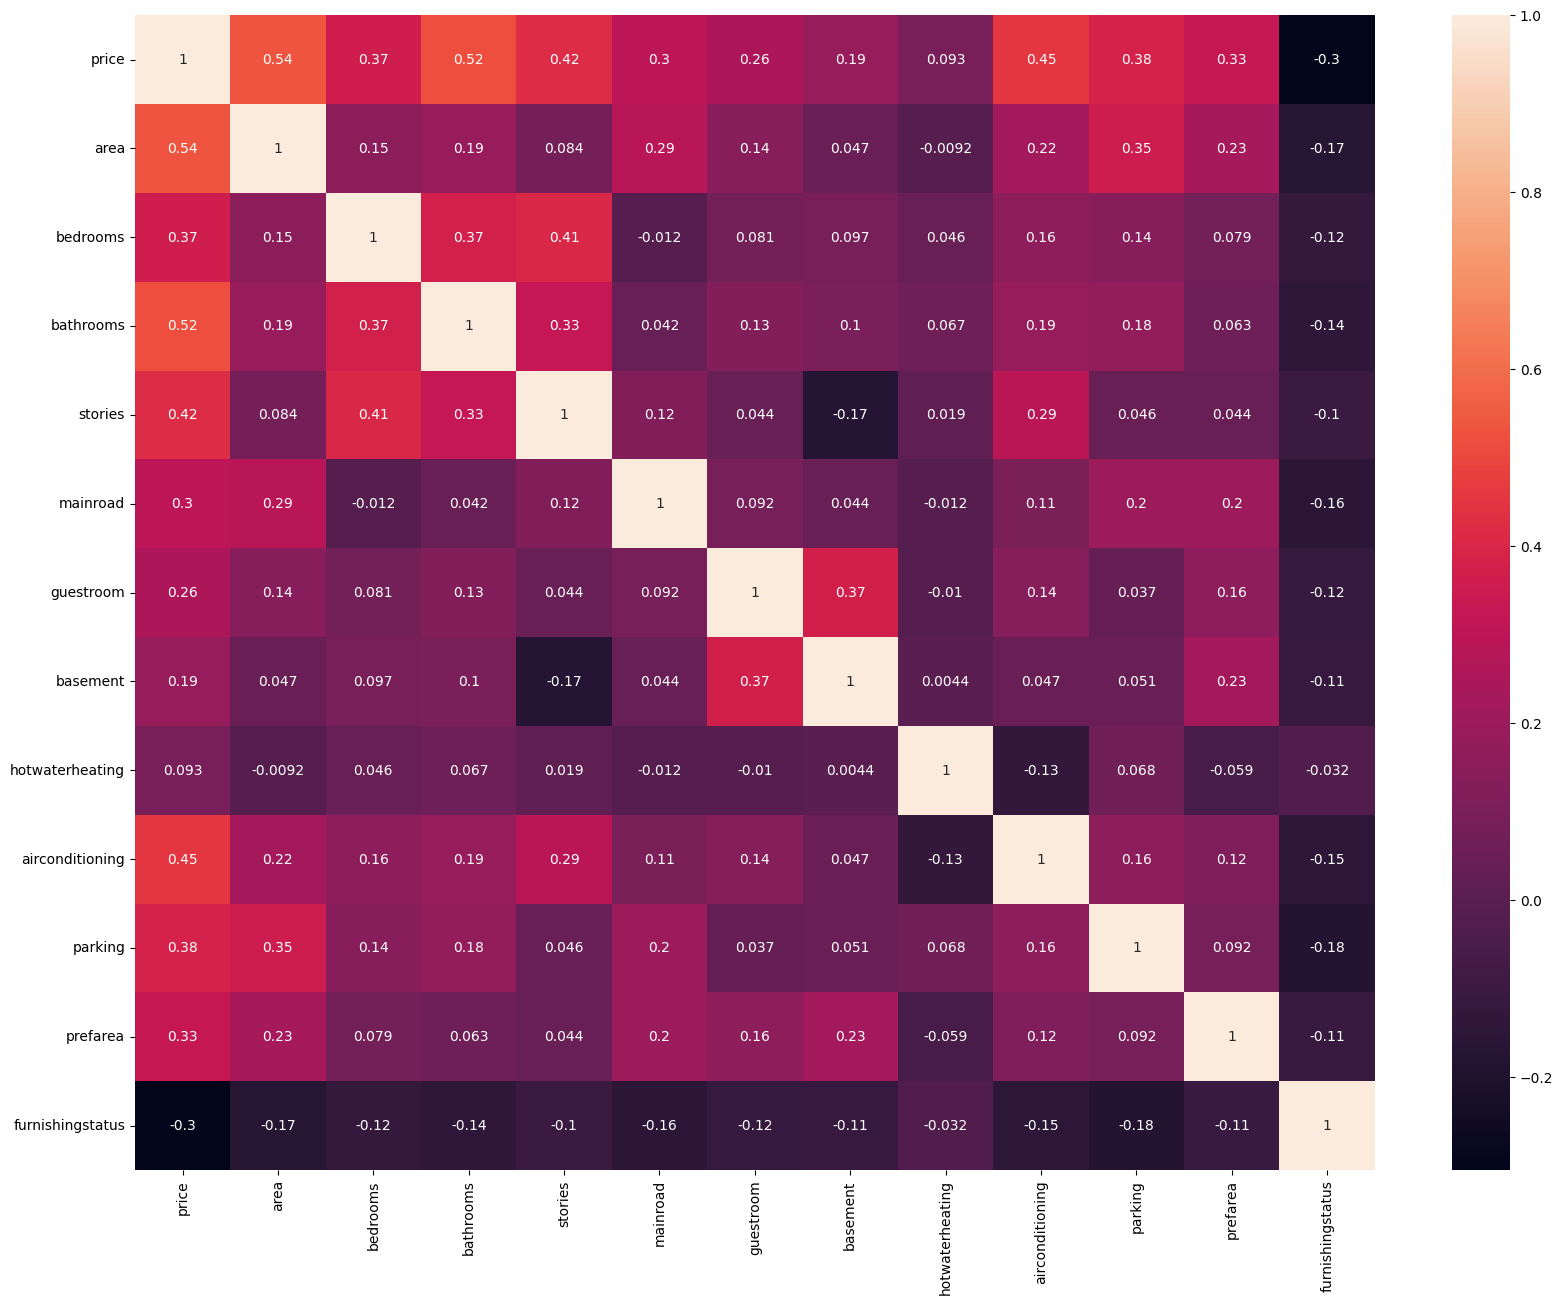

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(corr , annot = True)
plt.show()

In [27]:
# t = 'price'
# for col in one_hot_encoding.select_dtypes(['int64']).columns:
#   if col!= t :
#     plt.figure(figsize=(6,4))
#     sns.scatterplot(x = one_hot_encoding[col] , y= one_hot_encoding[t])
#     plt.show()

In [28]:
one_hot_encoding.to_csv("my_data.csv" , index=False)

In [29]:
x = data1
y = one_hot_encoding['price']

# NEW
x_new = data_2
y_new = label_encoding['price']

In [30]:
x.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,0.6,0.333333,0.666667,0.666667,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,0.666667,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.402062,0.6,0.333333,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.396564,0.6,0.000000,0.333333,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [31]:
x_new.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0


In [32]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [33]:
y_new.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

# 4.Model selection (build the model)


In [34]:
# NEW
x_train_new , x_test_new , y_train_new, y_test_new = train_test_split(x_new , y_new , test_size= 0.2 , random_state= 0)

In [35]:
model = LinearRegression()

In [36]:
# NEW
model.fit(x_train_new,
            y_train_new)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# NEW
y_pred_new = model.predict(x_test_new)

## using tree

In [38]:
x_train , x_test , y_train, y_test = train_test_split(x , y , test_size= 0.15 , random_state= 0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score

clf = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)
clf.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [56]:
for i in range (2, 16):
    clf = DecisionTreeRegressor(criterion="squared_error", max_depth=i, random_state=42)
    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

    print(f'R2 Score at depth = {i}:',
        round(metrics.r2_score(y_test, y_pred), 2)* 100)



R2 Score at depth = 2: 45.0
R2 Score at depth = 3: 37.0
R2 Score at depth = 4: 32.0
R2 Score at depth = 5: 21.0
R2 Score at depth = 6: 41.0
R2 Score at depth = 7: 34.0
R2 Score at depth = 8: 31.0
R2 Score at depth = 9: 40.0
R2 Score at depth = 10: 38.0
R2 Score at depth = 11: 46.0
R2 Score at depth = 12: 26.0
R2 Score at depth = 13: 36.0
R2 Score at depth = 14: 31.0
R2 Score at depth = 15: 32.0


## using forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

for i in range (2, 16):
    clff = RandomForestRegressor(criterion="squared_error", max_depth=i, random_state=42)
    clff.fit(x_train, y_train)

    y_pred = clff.predict(x_test)

    print(f'R2 Score at depth = {i}:',
        round(metrics.r2_score(y_test, y_pred), 2)* 100)

R2 Score at depth = 2: 52.0
R2 Score at depth = 3: 52.0
R2 Score at depth = 4: 54.0
R2 Score at depth = 5: 56.99999999999999
R2 Score at depth = 6: 57.99999999999999
R2 Score at depth = 7: 57.99999999999999
R2 Score at depth = 8: 56.99999999999999
R2 Score at depth = 9: 57.99999999999999
R2 Score at depth = 10: 57.99999999999999
R2 Score at depth = 11: 56.99999999999999
R2 Score at depth = 12: 57.99999999999999
R2 Score at depth = 13: 56.99999999999999
R2 Score at depth = 14: 56.00000000000001
R2 Score at depth = 15: 56.99999999999999


# 5.evaluating the model


In [41]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

x_train , x_test , y_train, y_test = train_test_split(x , y , test_size= 0.2 , random_state= 0)

# k_s = [i for i in range (1, 32)]

# for k in k_s:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train_new, y_train_new)
#     y_pred_new = knn.predict(x_test_new)

#     print(f'R2 Score for k = {k}:', metrics.r2_score(y_test_new, y_pred_new))
#     print('-'*50)

In [42]:
# NEW

import numpy as np

print("New results\n"+ "-"*30)

print('Mean Absolute Error:', 
                        round(metrics.mean_absolute_error(y_test_new, y_pred_new), 2) )

print('Mean Squared Error:', 
                        round(metrics.mean_squared_error(y_test_new, y_pred_new), 2) )

print('Root Mean Squared Error:', 
                        round(np.sqrt(metrics.mean_squared_error(y_test_new, y_pred_new)), 2) )

print('\nR2 Score:',
    round(metrics.r2_score(y_test_new, y_pred_new), 2)* 100)

New results
------------------------------
Mean Absolute Error: 716583.44
Mean Squared Error: 986041803890.02
Root Mean Squared Error: 992996.38

R2 Score: 66.0


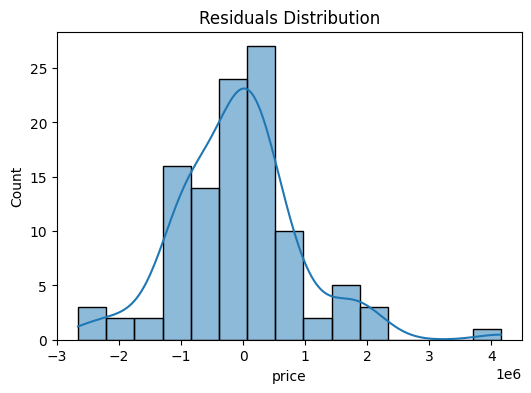

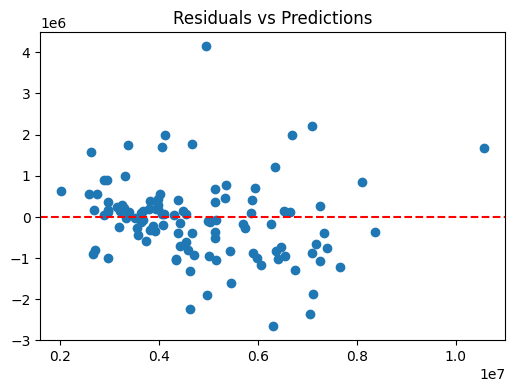

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test_new - y_pred_new

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_pred_new, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predictions")
plt.show()

In [44]:
df = pd.read_csv("my_data.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0
